# Task 1: Classification Model Implementation

In [60]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import numpy as np 

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Dataset paths

In [78]:
spam_dir = 'C:/Users/Darkness/Developments/quantbit/datasets/spam dataset/spam'
ham_dir = 'C:/Users/Darkness/Developments/quantbit/datasets/spam dataset/ham'
hard_ham_dir = 'C:/Users/Darkness/Developments/quantbit/datasets/spam dataset/hard_ham'

# Reading spam and ham files

In [79]:
emails, labels = [], []

for file in os.listdir(spam_dir):
    with open(os.path.join(spam_dir, file), 'r', encoding='latin1') as f:
        emails.append(f.read())
        labels.append(1)

for file in os.listdir(ham_dir):
    with open(os.path.join(ham_dir, file), 'r', encoding='latin1') as f:
        emails.append(f.read())
        labels.append(0)

for file in os.listdir(hard_ham_dir):
    with open(os.path.join(hard_ham_dir, file), 'r', encoding='latin1') as f:
        emails.append(f.read())
        labels.append(0)

In [81]:
len(emails), len(labels)

(3302, 3302)

# Lemmatization

In [62]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Darkness\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Darkness\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darkness\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [82]:
import string

def preprocess_text(text):
    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    words = nltk.word_tokenize(text)

    lemmatized_words = [
        lemmatizer.lemmatize(word)
        for word in words
        if word not in stop_words
    ]

    return ' '.join(lemmatized_words)

In [83]:
emails = [preprocess_text(email) for email in emails]

In [84]:
emails[50]

'billbluemaildk mon aug 26 151350 2002 returnpath billbluemaildk deliveredto zzzzlocalhostspamassassintaintorg received localhost localhost 127001 phoboslabsspamassassintaintorg postfix esmtp id 8f34d4415e zzzzlocalhost mon 26 aug 2002 101255 0400 edt received mailwebnotenet 193120211219 localhost pop3 fetchmail590 zzzzlocalhost singledrop mon 26 aug 2002 151255 0100 ist received smtpeasydnscom smtpeasydnscom 2052104230 webnotenet 893893 esmtp id saa16726 sat 24 aug 2002 184742 0100 billbluemaildk received bluemaildk klhtnetklhtpvtk12ctus 2069792 smtpeasydnscom postfix smtp id 4b6b52e859 sat 24 aug 2002 134659 0400 edt replyto billbluemaildk messageid 000b11a65aad8587c2b33bb78ec3ubrjup byrt5hotmailcom subject fortune 500 company hiring home rep mimeversion 10 contenttype textplain charsetiso88591 xpriority 3 normal xmsmailpriority normal xmailer internet mail service 55265021 importance normal date sat 24 aug 2002 134659 0400 edt contenttransferencoding 8bit help wanted 14 year old for

# Feature Extraction

In [85]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X = vectorizer.fit_transform(emails).toarray()
y = labels

X.shape

(3302, 5000)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
y_pred = rf_model.predict(X_test)

In [89]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9949545913218971
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       817
           1       1.00      0.97      0.99       174

    accuracy                           0.99       991
   macro avg       1.00      0.99      0.99       991
weighted avg       0.99      0.99      0.99       991



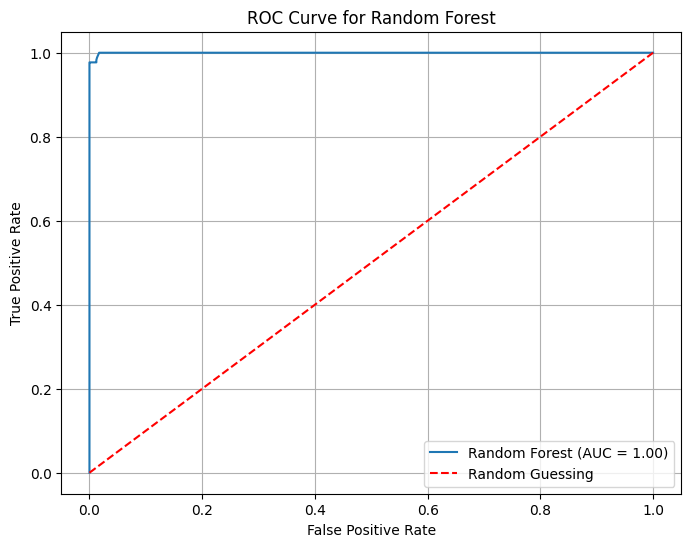

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()